In [1]:
#Uploading packaged
import numpy as np
import pylab as pl
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mp


In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#reading in csv
aqs_pm10='aqs_site_06-019-0011_81102.csv'
aqs_pm25='aqs_site_06-019-0011_88101.csv'

#saving csv file in a dataframe
df_pm10=pd.read_csv(aqs_pm10)
df_pm25=pd.read_csv(aqs_pm25)


In [3]:
#saving datetime
df_pm10['datetime_local']=pd.to_datetime(df_pm10.datetime_local)
df_pm25['datetime_local']=pd.to_datetime(df_pm25.datetime_local)


In [4]:
#group by function and grouper by pandas to make a monthly or annual avg. make a new dataframe for that. 

#adding a year column
df_pm10['year']=df_pm10.datetime_local.dt.year
df_pm25['year']=df_pm25.datetime_local.dt.year

#adding a date column
df_pm10['date']=df_pm10.datetime_local.dt.date
df_pm25['date']=df_pm25.datetime_local.dt.date

#adding a month column
df_pm10['month']=df_pm10.datetime_local.dt.month
df_pm25['month']=df_pm25.datetime_local.dt.month


In [5]:
#reading the date/ time as a date/ time for python 
pm10_2013 = df_pm10[df_pm10['datetime_local'].dt.year == 2013]
pm25_2013 = df_pm25[df_pm25['datetime_local'].dt.year == 2013]

In [6]:
#Making the statistics for the percentiles 
pm10_2013_stats=pm10_2013.groupby('date').describe().reset_index()
pm25_2013_stats=pm25_2013.groupby('date').describe().reset_index()

TypeError: float() argument must be a string or a number, not 'datetime.date'

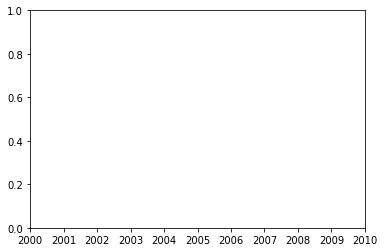

In [7]:
#A plot of the daily averages of PM 10 for all of 2013 in picometers.
#blue points are the pm concentrations per hour for each day. Bottom of Orange is the 25th percentile and top of orange is the 75th percentile

#PM 10
fig, ax=plt.subplots()
plt.scatter(pm10_2013['date'], pm10_2013['sample_measurement'], s=2, label='Hourly Averages of PM 10 Per Day in 2013')
plt.fill_between(pm10_2013_stats['date'], pm10_2013_stats['sample_measurement']['25%'],pm10_2013_stats['sample_measurement']['75%'],alpha=1, label='25th percentile and 75th percentile')
plt.xlabel('Date')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.title("Daily Concentrations of PM 10 For Each Hour Per Day in 2013 in Fresno, California")
plt.legend() 
plt.show()


#PM 2.5
fig, ax=plt.subplots()
plt.scatter(pm25_2013['date'], pm25_2013['sample_measurement'], s=2, label='Hourly Averages of PM 2.5 Per Day in 2013')
plt.fill_between(pm25_2013_stats['date'], pm25_2013_stats['sample_measurement']['25%'],pm25_2013_stats['sample_measurement']['75%'],alpha=1, label='25th percentile and 75th percentile')
plt.xlabel('Date')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.title("Daily Concentrations of PM 2.5 For Each Hour Per Day in 2013 in Fresno, California")
plt.legend() 
plt.show()


In [8]:
#saving the daily 2013 data by grouping by date and taking the mean for all of the individual days in 2013. Note: original data was taking the sample measurement of PM for each HOUR.
daily_2013_pm10=pm10_2013.groupby('date').mean().reset_index()
daily_2013_pm25=pm25_2013.groupby('date').mean().reset_index()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

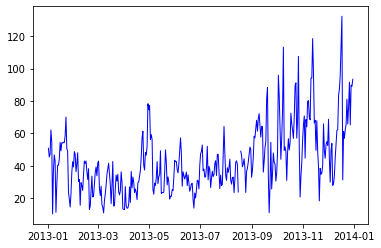

In [9]:
#plot the daily 2013 data's means for all of the individual days in 2013 and the 25th nd 75th percentiles 
#PM 10
fig, ax=plt.subplots()
plt.plot(daily_2013_pm10['date'], daily_2013_pm10['sample_measurement'], c='b', lw=1, label='Daily averages of PM10 data for 2013')
plt.fill_between(pm10_2013_stats['date'], pm10_2013_stats['sample_measurement']['25%'],pm10_2013_stats['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Date')
plt.ylabel('PM 10 micrograms per cubic meter')
plt.title("Daily Averages of PM 10 in 2013 in Fresno, California")
plt.legend() 
plt.show()

#PM 2.5
fig, ax=plt.subplots()
plt.plot(daily_2013_pm25['date'], daily_2013_pm25['sample_measurement'], c='b', lw=1, label='Daily averages of PM 2.5 data for 2013')
plt.fill_between(pm25_2013_stats['date'], pm25_2013_stats['sample_measurement']['25%'],pm25_2013_stats['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Date')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.title("Daily Averages of PM 2.5 in 2013 in Fresno, California")
plt.legend() 
plt.show()

In [24]:
#work on setting the x limit to see a select few days (like january to feb. see cell)
#work on seeing monthly data for 2013 (idk ill figure this out tomorrow)

In [25]:
######################### ALL DATA #########################

In [26]:
##Hourly data##

In [27]:
#making stats for code
df_pm10_stats=df_pm10.groupby('date').describe().reset_index()
df_pm25_stats=df_pm25.groupby('date').describe().reset_index()

TypeError: float() argument must be a string or a number, not 'datetime.date'

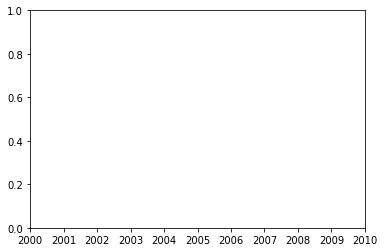

In [28]:
#Plotting the HOURL averages of PM 10 & PM 2.5 for years 2013-2021 in picometers.

#PM 10
fig, ax=plt.subplots()
plt.scatter(df_pm10['date'], df_pm10['sample_measurement'], s=2, label='Hourly Averages of PM 10 Per Day in 2013-2021')
plt.fill_between(df_pm10_stats['date'], df_pm10_stats['sample_measurement']['25%'],df_pm10_stats['sample_measurement']['75%'],alpha=1, label='25th percentile and 75th percentile')
plt.xlabel('Year')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.title("Daily Concentrations of PM 10 For Each Hour Per Day in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.05, 1.0)) 
plt.show()

#PM 2.5
fig, ax=plt.subplots()
plt.scatter(df_pm25['date'], df_pm25['sample_measurement'], s=2, label='Hourly Averages of PM 2.5 Per Day in 2013-2021')
plt.fill_between(df_pm25_stats['date'], df_pm25_stats['sample_measurement']['25%'],df_pm25_stats['sample_measurement']['75%'],alpha=1, label='25th percentile and 75th percentile')
plt.xlabel('Year')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.title("Daily Concentrations of PM 2.5 For Each Hour Per Day in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.05, 1.0)) 
plt.show()

In [29]:
##Daily data##

In [30]:
#saving the daily 2013 data by grouping by date and taking the mean for all of the individual days in 2013. Note: original data was taking the sample measurement of PM for each HOUR.
daily_pm10=df_pm10.groupby('date').mean().reset_index()
daily_pm25=df_pm25.groupby('date').mean().reset_index()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

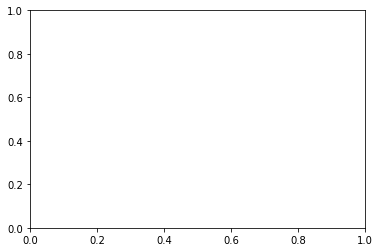

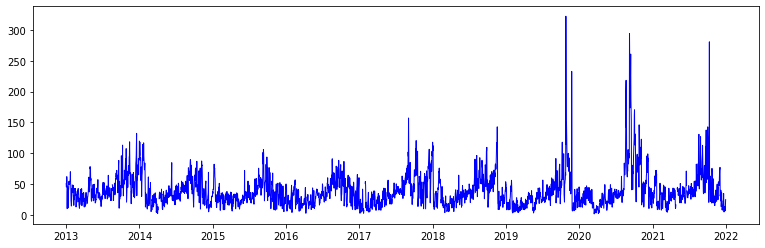

In [31]:
#plot the daily 2013 data's means for all of the individual days in 2013 and the 25th nd 75th percentiles 
#PM 10
fig, ax=plt.subplots()
fig= plt.figure(figsize=(13,4))
plt.plot(daily_pm10['date'], daily_pm10['sample_measurement'], c='b', lw=1, label='Daily averages of PM10 for 2013-2021')
plt.fill_between(df_pm10_stats['date'], df_pm10_stats['sample_measurement']['25%'],df_pm10_stats['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Year')
plt.ylabel('PM 10 micrograms per cubic meter')
plt.title("Daily Averages of PM 10 in 2013-2021 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#PM 2.5
fig, ax=plt.subplots()
fig= plt.figure(figsize=(13,4))
plt.plot(daily_pm25['date'], daily_pm25['sample_measurement'], c='b', lw=1, label='Daily averages of PM 2.5 for 2013-2021')
plt.fill_between(df_pm25_stats['date'], df_pm25_stats['sample_measurement']['25%'],df_pm25_stats['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Year')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim=(0,600)
plt.title("Daily Averages of PM 2.5 in 2013-2021 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#bbox_to_anchor=(1.8, 1.0)

In [18]:
##Monthly data##

In [30]:
#PM 10
#Selecting individual years
#pm10_2013 = df_pm10[df_pm10['datetime_local'].dt.year == 2013]
pm10_2014 = df_pm10[df_pm10['datetime_local'].dt.year == 2014]
pm10_2015 = df_pm10[df_pm10['datetime_local'].dt.year == 2015]
pm10_2016 = df_pm10[df_pm10['datetime_local'].dt.year == 2016]
pm10_2017 = df_pm10[df_pm10['datetime_local'].dt.year == 2017]
pm10_2018 = df_pm10[df_pm10['datetime_local'].dt.year == 2018]
pm10_2019 = df_pm10[df_pm10['datetime_local'].dt.year == 2019]
pm10_2020 = df_pm10[df_pm10['datetime_local'].dt.year == 2020]
pm10_2021 = df_pm10[df_pm10['datetime_local'].dt.year == 2021]

#Making monthly averages
pm10_2013_monthlys=pm10_2013.groupby('month').mean().reset_index()
pm10_2014_monthlys=pm10_2014.groupby('month').mean().reset_index()
pm10_2015_monthlys=pm10_2015.groupby('month').mean().reset_index()
pm10_2016_monthlys=pm10_2016.groupby('month').mean().reset_index()
pm10_2017_monthlys=pm10_2017.groupby('month').mean().reset_index()
pm10_2018_monthlys=pm10_2018.groupby('month').mean().reset_index()
pm10_2019_monthlys=pm10_2019.groupby('month').mean().reset_index()
pm10_2020_monthlys=pm10_2020.groupby('month').mean().reset_index()
pm10_2021_monthlys=pm10_2021.groupby('month').mean().reset_index()

pm10_2013_monthlys

,month,sample_measurement,latitude,longitude,year
0,1,42.149596,36.78538,-119.77321,2013.0
1,2,32.589820,36.78538,-119.77321,2013.0
2,3,27.110811,36.78538,-119.77321,2013.0
3,4,32.350070,36.78538,-119.77321,2013.0
4,5,35.681756,36.78538,-119.77321,2013.0
5,6,32.677511,36.78538,-119.77321,2013.0
6,7,39.434483,36.78538,-119.77321,2013.0
7,8,38.108597,36.78538,-119.77321,2013.0
8,9,50.685754,36.78538,-119.77321,2013.0
9,10,60.584810,36.78538,-119.77321,2013.0


In [31]:
#PM 2.5
#Selecting individual years
#pm25_2013 = df_pm25[df_pm25['datetime_local'].dt.year == 2013]
pm25_2014 = df_pm25[df_pm25['datetime_local'].dt.year == 2014]
pm25_2015 = df_pm25[df_pm25['datetime_local'].dt.year == 2015]
pm25_2016 = df_pm25[df_pm25['datetime_local'].dt.year == 2016]
pm25_2017 = df_pm25[df_pm25['datetime_local'].dt.year == 2017]
pm25_2018 = df_pm25[df_pm25['datetime_local'].dt.year == 2018]
pm25_2019 = df_pm25[df_pm25['datetime_local'].dt.year == 2019]
pm25_2020 = df_pm25[df_pm25['datetime_local'].dt.year == 2020]
pm25_2021 = df_pm25[df_pm25['datetime_local'].dt.year == 2021]

#Making monthly averages
pm25_2013_monthlys=pm25_2013.groupby('month').mean().reset_index()
pm25_2014_monthlys=pm25_2014.groupby('month').mean().reset_index()
pm25_2015_monthlys=pm25_2015.groupby('month').mean().reset_index()
pm25_2016_monthlys=pm25_2016.groupby('month').mean().reset_index()
pm25_2017_monthlys=pm25_2017.groupby('month').mean().reset_index()
pm25_2018_monthlys=pm25_2018.groupby('month').mean().reset_index()
pm25_2019_monthlys=pm25_2019.groupby('month').mean().reset_index()
pm25_2020_monthlys=pm25_2020.groupby('month').mean().reset_index()
pm25_2021_monthlys=pm25_2021.groupby('month').mean().reset_index()

In [32]:
#making stats
#PM 10
pm10_stats_2013=pm10_2013.groupby('month').describe().reset_index()
pm10_stats_2014=pm10_2014.groupby('month').describe().reset_index()
pm10_stats_2015=pm10_2015.groupby('month').describe().reset_index()
pm10_stats_2016=pm10_2016.groupby('month').describe().reset_index()
pm10_stats_2017=pm10_2017.groupby('month').describe().reset_index()
pm10_stats_2018=pm10_2018.groupby('month').describe().reset_index()
pm10_stats_2019=pm10_2019.groupby('month').describe().reset_index()
pm10_stats_2020=pm10_2020.groupby('month').describe().reset_index()
pm10_stats_2021=pm10_2021.groupby('month').describe().reset_index()

#PM 2.5
pm25_stats_2013=pm25_2013.groupby('month').describe().reset_index()
pm25_stats_2014=pm25_2014.groupby('month').describe().reset_index()
pm25_stats_2015=pm25_2015.groupby('month').describe().reset_index()
pm25_stats_2016=pm25_2016.groupby('month').describe().reset_index()
pm25_stats_2017=pm25_2017.groupby('month').describe().reset_index()
pm25_stats_2018=pm25_2018.groupby('month').describe().reset_index()
pm25_stats_2019=pm25_2019.groupby('month').describe().reset_index()
pm25_stats_2020=pm25_2020.groupby('month').describe().reset_index()
pm25_stats_2021=pm25_2021.groupby('month').describe().reset_index()

TypeError: 'tuple' object is not callable

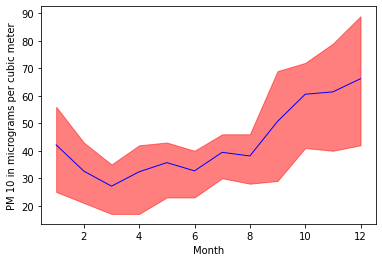

In [33]:
#Plotting for PM 10s
#2013
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2013_monthlys['month'], pm10_2013_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2013')
plt.fill_between(pm10_stats_2013['month'], pm10_stats_2013['sample_measurement']['25%'],pm10_stats_2013['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2013 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2014
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2014_monthlys['month'], pm10_2014_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2014')
plt.fill_between(pm10_stats_2014['month'], pm10_stats_2014['sample_measurement']['25%'],pm10_stats_2014['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2014 in Fresno, California")
plt.legend(loc='upper right') 
plt.show()

#2015
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2015_monthlys['month'], pm10_2015_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2015')
plt.fill_between(pm10_stats_2015['month'], pm10_stats_2015['sample_measurement']['25%'],pm10_stats_2015['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2015 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2016
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2016_monthlys['month'], pm10_2016_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2016')
plt.fill_between(pm10_stats_2016['month'], pm10_stats_2016['sample_measurement']['25%'],pm10_stats_2016['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2016 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2017
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2017_monthlys['month'], pm10_2017_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2014')
plt.fill_between(pm10_stats_2017['month'], pm10_stats_2017['sample_measurement']['25%'],pm10_stats_2017['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2017 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2018
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2018_monthlys['month'], pm10_2018_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2018')
plt.fill_between(pm10_stats_2018['month'], pm10_stats_2018['sample_measurement']['25%'],pm10_stats_2018['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2018 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2019
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2019_monthlys['month'], pm10_2019_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2019')
plt.fill_between(pm10_stats_2019['month'], pm10_stats_2019['sample_measurement']['25%'],pm10_stats_2019['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2019 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2020
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2020_monthlys['month'], pm10_2020_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2020')
plt.fill_between(pm10_stats_2020['month'], pm10_stats_2020['sample_measurement']['25%'],pm10_stats_2020['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2020 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2021
#PM 10
fig, ax=plt.subplots()
plt.plot(pm10_2021_monthlys['month'], pm10_2021_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM10 for 2021')
plt.fill_between(pm10_stats_2021['month'], pm10_stats_2021['sample_measurement']['25%'],pm10_stats_2021['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
plt.ylim(0,200)
plt.title("Monthly Averages of PM 10 in 2021 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()


TypeError: 'tuple' object is not callable

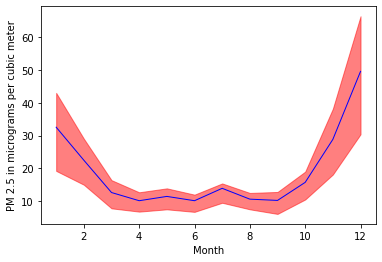

In [34]:
#Plotting for PM 2.5s
#2013
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2013_monthlys['month'], pm25_2013_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2013')
plt.fill_between(pm25_stats_2013['month'], pm25_stats_2013['sample_measurement']['25%'],pm25_stats_2013['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2013 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2014
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2014_monthlys['month'], pm25_2014_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2014')
plt.fill_between(pm25_stats_2014['month'], pm25_stats_2014['sample_measurement']['25%'],pm25_stats_2014['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2014 in Fresno, California")
plt.legend(loc='upper right') 
plt.show()

#2015
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2015_monthlys['month'], pm25_2015_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2015')
plt.fill_between(pm25_stats_2015['month'], pm25_stats_2015['sample_measurement']['25%'],pm25_stats_2015['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2015 in Fresno, California")
plt.legend(loc='upper right') 
plt.show()

#2016
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2016_monthlys['month'], pm25_2016_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2016')
plt.fill_between(pm25_stats_2016['month'], pm25_stats_2016['sample_measurement']['25%'],pm25_stats_2016['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2016 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2017
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2017_monthlys['month'], pm25_2017_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2014')
plt.fill_between(pm25_stats_2017['month'], pm25_stats_2017['sample_measurement']['25%'],pm25_stats_2017['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2017 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2018
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2018_monthlys['month'], pm25_2018_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2018')
plt.fill_between(pm25_stats_2018['month'], pm25_stats_2018['sample_measurement']['25%'],pm25_stats_2018['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2018 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2019
#PM 2.5
fig, ax=plt.subplots()
plt.plot(pm25_2019_monthlys['month'], pm25_2019_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2019')
plt.fill_between(pm25_stats_2019['month'], pm25_stats_2019['sample_measurement']['25%'],pm25_stats_2019['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2019 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2020
#PM 10
fig, ax=plt.subplots()
plt.plot(pm25_2020_monthlys['month'], pm25_2020_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2020')
plt.fill_between(pm25_stats_2020['month'], pm25_stats_2020['sample_measurement']['25%'],pm25_stats_2020['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2020 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()

#2021
#PM 10
fig, ax=plt.subplots()
plt.plot(pm25_2021_monthlys['month'], pm25_2021_monthlys['sample_measurement'], c='b', lw=1, label='Monthly averages of PM 2.5 for 2021')
plt.fill_between(pm25_stats_2021['month'], pm25_stats_2021['sample_measurement']['25%'],pm25_stats_2021['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='r')
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Monthly Averages of PM 2.5 in 2021 in Fresno, California")
plt.legend(loc='upper left') 
plt.show()


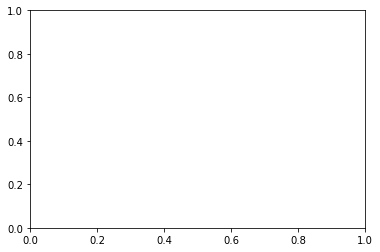

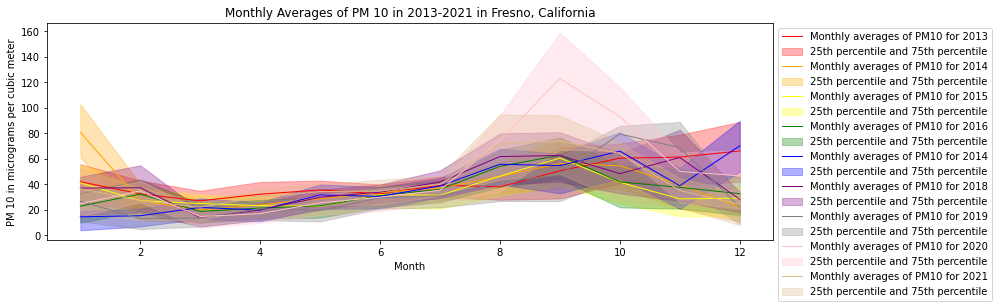

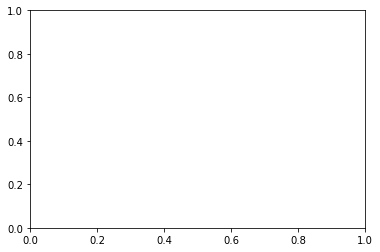

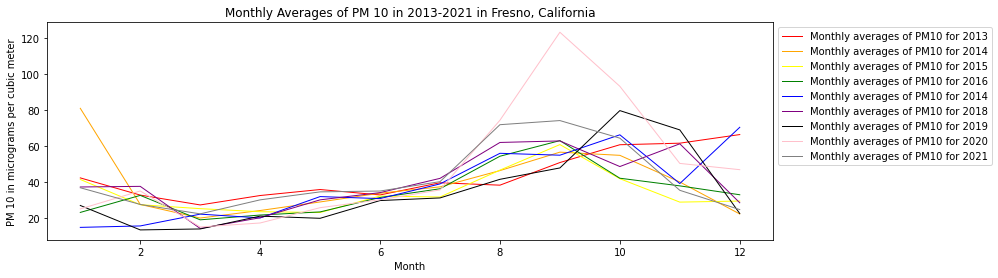

In [53]:
#Combining monthly average plots to make one big one for all years for PM 10

fg, ax=plt.subplots()
fig= plt.figure(figsize=(13,4))
#2013
#PM 10
plt.plot(pm10_2013_monthlys['month'], pm10_2013_monthlys['sample_measurement'], c='red', lw=1, label='Monthly averages of PM10 for 2013', alpha=1)
plt.fill_between(pm10_stats_2013['month'], pm10_stats_2013['sample_measurement']['25%'],pm10_stats_2013['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='red')


#2014
#PM 10
plt.plot(pm10_2014_monthlys['month'], pm10_2014_monthlys['sample_measurement'], c='orange', lw=1, label='Monthly averages of PM10 for 2014', alpha=1)
plt.fill_between(pm10_stats_2014['month'], pm10_stats_2014['sample_measurement']['25%'],pm10_stats_2014['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='orange')

#2015
#PM 10
plt.plot(pm10_2015_monthlys['month'], pm10_2015_monthlys['sample_measurement'], c='yellow', lw=1, label='Monthly averages of PM10 for 2015', alpha=1)
plt.fill_between(pm10_stats_2015['month'], pm10_stats_2015['sample_measurement']['25%'],pm10_stats_2015['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='yellow')

#2016
#PM 10
plt.plot(pm10_2016_monthlys['month'], pm10_2016_monthlys['sample_measurement'], c='green', lw=1, label='Monthly averages of PM10 for 2016', alpha=1)
plt.fill_between(pm10_stats_2016['month'], pm10_stats_2016['sample_measurement']['25%'],pm10_stats_2016['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='green')

#2017
#PM 10
plt.plot(pm10_2017_monthlys['month'], pm10_2017_monthlys['sample_measurement'], c='blue', lw=1, label='Monthly averages of PM10 for 2014', alpha=1)
plt.fill_between(pm10_stats_2017['month'], pm10_stats_2017['sample_measurement']['25%'],pm10_stats_2017['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='blue')

#2018
#PM 10
plt.plot(pm10_2018_monthlys['month'], pm10_2018_monthlys['sample_measurement'], c='purple', lw=1, label='Monthly averages of PM10 for 2018', alpha=1)
plt.fill_between(pm10_stats_2018['month'], pm10_stats_2018['sample_measurement']['25%'],pm10_stats_2018['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='purple')

#2019
#PM 10
plt.plot(pm10_2019_monthlys['month'], pm10_2019_monthlys['sample_measurement'], c='grey', lw=1, label='Monthly averages of PM10 for 2019', alpha=1)
plt.fill_between(pm10_stats_2019['month'], pm10_stats_2019['sample_measurement']['25%'],pm10_stats_2019['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='grey')

#2020
#PM 10
plt.plot(pm10_2020_monthlys['month'], pm10_2020_monthlys['sample_measurement'], c='pink', lw=1, label='Monthly averages of PM10 for 2020', alpha=1)
plt.fill_between(pm10_stats_2020['month'], pm10_stats_2020['sample_measurement']['25%'],pm10_stats_2020['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='pink')

#PM 10
plt.plot(pm10_2021_monthlys['month'], pm10_2021_monthlys['sample_measurement'], c='burlywood', lw=1, label='Monthly averages of PM10 for 2021', alpha=1)
plt.fill_between(pm10_stats_2021['month'], pm10_stats_2021['sample_measurement']['25%'],pm10_stats_2021['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='burlywood')

#Rest of Garaph Detalis
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
#plt.ylim(0,170)
plt.title("Monthly Averages of PM 10 in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show()

#Combining monthly average plots to make one big one for all years 

fg, ax=plt.subplots()
fig= plt.figure(figsize=(13,4))
#2013
#PM 10
plt.plot(pm10_2013_monthlys['month'], pm10_2013_monthlys['sample_measurement'], c='red', lw=1, label='Monthly averages of PM10 for 2013')


#2014
#PM 10
plt.plot(pm10_2014_monthlys['month'], pm10_2014_monthlys['sample_measurement'], c='orange', lw=1, label='Monthly averages of PM10 for 2014')

#2015
#PM 10
plt.plot(pm10_2015_monthlys['month'], pm10_2015_monthlys['sample_measurement'], c='yellow', lw=1, label='Monthly averages of PM10 for 2015')

#2016
#PM 10
plt.plot(pm10_2016_monthlys['month'], pm10_2016_monthlys['sample_measurement'], c='green', lw=1, label='Monthly averages of PM10 for 2016')

#2017
#PM 10
plt.plot(pm10_2017_monthlys['month'], pm10_2017_monthlys['sample_measurement'], c='blue', lw=1, label='Monthly averages of PM10 for 2014')

#2018
#PM 10
plt.plot(pm10_2018_monthlys['month'], pm10_2018_monthlys['sample_measurement'], c='purple', lw=1, label='Monthly averages of PM10 for 2018')

#2019
#PM 10
plt.plot(pm10_2019_monthlys['month'], pm10_2019_monthlys['sample_measurement'], c='black', lw=1, label='Monthly averages of PM10 for 2019')

#2020
#PM 10
plt.plot(pm10_2020_monthlys['month'], pm10_2020_monthlys['sample_measurement'], c='pink', lw=1, label='Monthly averages of PM10 for 2020')

#PM 10
plt.plot(pm10_2021_monthlys['month'], pm10_2021_monthlys['sample_measurement'], c='grey', lw=1, label='Monthly averages of PM10 for 2021')

#Rest of Garaph Detalis
plt.xlabel('Month')
plt.ylabel('PM 10 in micrograms per cubic meter')
#plt.ylim(0,170)
plt.title("Monthly Averages of PM 10 in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show()



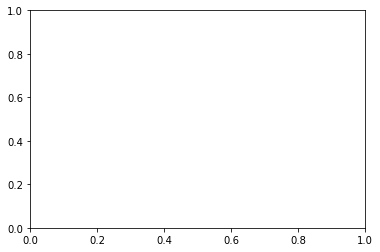

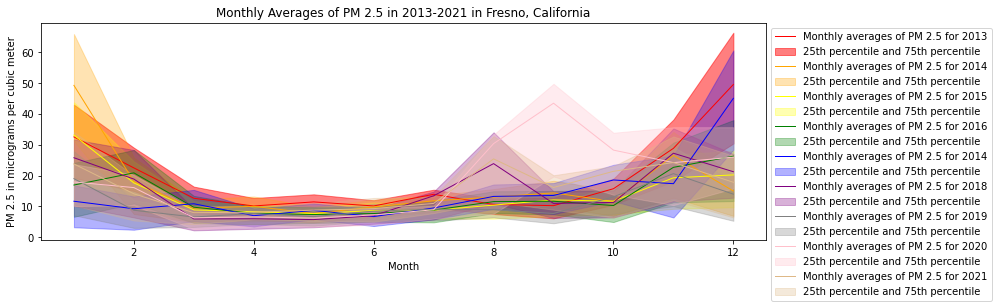

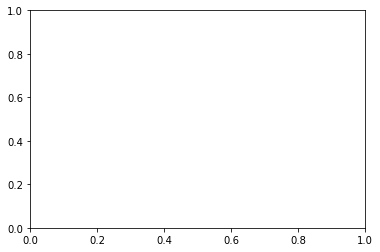

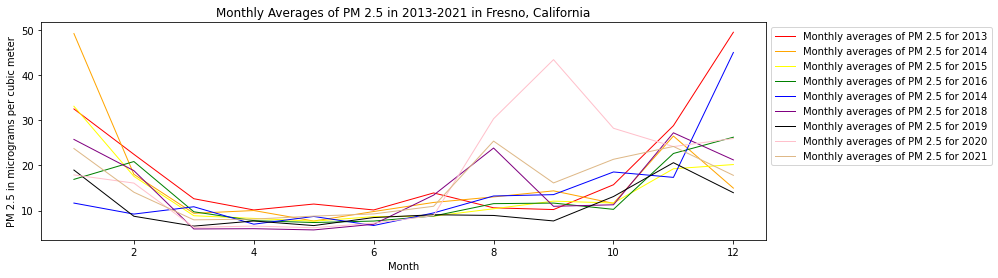

In [55]:
#Combining monthly average plots to make one big one for all years for PM 2.5

fg, ax=plt.subplots()
fig= plt.figure(figsize=(13,4))
#2013
#PM 2.5
plt.plot(pm25_2013_monthlys['month'], pm25_2013_monthlys['sample_measurement'], c='red', lw=1, label='Monthly averages of PM 2.5 for 2013', alpha=1)
plt.fill_between(pm25_stats_2013['month'], pm25_stats_2013['sample_measurement']['25%'],pm25_stats_2013['sample_measurement']['75%'], label='25th percentile and 75th percentile',color='red', alpha=0.5)


#2014
#PM 2.5
plt.plot(pm25_2014_monthlys['month'], pm25_2014_monthlys['sample_measurement'], c='orange', lw=1, label='Monthly averages of PM 2.5 for 2014')
plt.fill_between(pm25_stats_2014['month'], pm25_stats_2014['sample_measurement']['25%'],pm25_stats_2014['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='orange')

#2015
#PM 2.5
plt.plot(pm25_2015_monthlys['month'], pm25_2015_monthlys['sample_measurement'], c='yellow', lw=1, label='Monthly averages of PM 2.5 for 2015')
plt.fill_between(pm25_stats_2015['month'], pm25_stats_2015['sample_measurement']['25%'],pm25_stats_2015['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='yellow')

#2016
#PM 2.5
plt.plot(pm25_2016_monthlys['month'], pm25_2016_monthlys['sample_measurement'], c='green', lw=1, label='Monthly averages of PM 2.5 for 2016')
plt.fill_between(pm25_stats_2016['month'], pm25_stats_2016['sample_measurement']['25%'],pm25_stats_2016['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='green')

#2017
#PM 2.5
plt.plot(pm25_2017_monthlys['month'], pm25_2017_monthlys['sample_measurement'], c='blue', lw=1, label='Monthly averages of PM 2.5 for 2014')
plt.fill_between(pm25_stats_2017['month'], pm25_stats_2017['sample_measurement']['25%'],pm25_stats_2017['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='blue')

#2018
#PM 2.5
plt.plot(pm25_2018_monthlys['month'], pm25_2018_monthlys['sample_measurement'], c='purple', lw=1, label='Monthly averages of PM 2.5 for 2018')
plt.fill_between(pm25_stats_2018['month'], pm25_stats_2018['sample_measurement']['25%'],pm25_stats_2018['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='purple')

#2019
#PM 2.5
plt.plot(pm25_2019_monthlys['month'], pm25_2019_monthlys['sample_measurement'], c='grey', lw=1, label='Monthly averages of PM 2.5 for 2019')
plt.fill_between(pm25_stats_2019['month'], pm25_stats_2019['sample_measurement']['25%'],pm25_stats_2019['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='grey')

#2020
#PM 2.5
plt.plot(pm25_2020_monthlys['month'], pm25_2020_monthlys['sample_measurement'], c='pink', lw=1, label='Monthly averages of PM 2.5 for 2020')
plt.fill_between(pm25_stats_2020['month'], pm25_stats_2020['sample_measurement']['25%'],pm25_stats_2020['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='pink')

#2021
#PM 2.5
plt.plot(pm25_2021_monthlys['month'], pm25_2021_monthlys['sample_measurement'], c='burlywood', lw=1, label='Monthly averages of PM 2.5 for 2021')
plt.fill_between(pm25_stats_2021['month'], pm25_stats_2021['sample_measurement']['25%'],pm25_stats_2021['sample_measurement']['75%'],alpha=.3, label='25th percentile and 75th percentile',color='burlywood')

#Rest of Garaph Detalis
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
#plt.ylim(0,75)
plt.title("Monthly Averages of PM 2.5 in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show()

#Combining monthly average plots to make one big one for all years 

fg, ax=plt.subplots()
fig= plt.figure(figsize=(13,4))
#2013
#PM 2.5
plt.plot(pm25_2013_monthlys['month'], pm25_2013_monthlys['sample_measurement'], c='red', lw=1, label='Monthly averages of PM 2.5 for 2013')


#2014
#PM 2.5
plt.plot(pm25_2014_monthlys['month'], pm25_2014_monthlys['sample_measurement'], c='orange', lw=1, label='Monthly averages of PM 2.5 for 2014')

#2015
#PM 2.5
plt.plot(pm25_2015_monthlys['month'], pm25_2015_monthlys['sample_measurement'], c='yellow', lw=1, label='Monthly averages of PM 2.5 for 2015')

#2016
#PM 2.5
plt.plot(pm25_2016_monthlys['month'], pm25_2016_monthlys['sample_measurement'], c='green', lw=1, label='Monthly averages of PM 2.5 for 2016')

#2017
#PM 2.5
plt.plot(pm25_2017_monthlys['month'], pm25_2017_monthlys['sample_measurement'], c='blue', lw=1, label='Monthly averages of PM 2.5 for 2014')

#2018
#PM 2.5
plt.plot(pm25_2018_monthlys['month'], pm25_2018_monthlys['sample_measurement'], c='purple', lw=1, label='Monthly averages of PM 2.5 for 2018')

#2019
#PM 2.5
plt.plot(pm25_2019_monthlys['month'], pm25_2019_monthlys['sample_measurement'], c='black', lw=1, label='Monthly averages of PM 2.5 for 2019')

#2020
#PM 2.5
plt.plot(pm25_2020_monthlys['month'], pm25_2020_monthlys['sample_measurement'], c='pink', lw=1, label='Monthly averages of PM 2.5 for 2020')

#PM 2.5
plt.plot(pm25_2021_monthlys['month'], pm25_2021_monthlys['sample_measurement'], c='burlywood', lw=1, label='Monthly averages of PM 2.5 for 2021')

#Rest of Garaph Detalis
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
#plt.ylim(0,75)
plt.title("Monthly Averages of PM 2.5 in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show()



TypeError: 'tuple' object is not callable

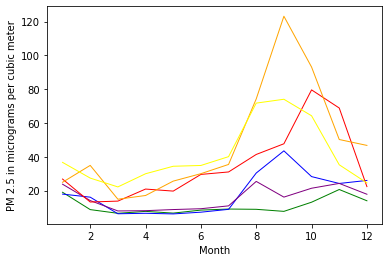

In [37]:
#Plotting 2019, 2020, and 2021 on same graph to see covid's impact for PM 10 and PM 2.5 
#No percentiles 
fg, ax=plt.subplots()
#2019
#PM 2.5
plt.plot(pm25_2019_monthlys['month'], pm25_2019_monthlys['sample_measurement'], c='green', lw=1, label='Monthly averages of PM 2.5 for 2019')

#2020
#PM 2.5
plt.plot(pm25_2020_monthlys['month'], pm25_2020_monthlys['sample_measurement'], c='blue', lw=1, label='Monthly averages of PM 2.5 for 2020')

#PM 2.5
plt.plot(pm25_2021_monthlys['month'], pm25_2021_monthlys['sample_measurement'], c='purple', lw=1, label='Monthly averages of PM 2.5 for 2021')

#2019
#PM 10
plt.plot(pm10_2019_monthlys['month'], pm10_2019_monthlys['sample_measurement'], c='red', lw=1, label='Monthly averages of PM10 for 2019')

#2020
#PM 10
plt.plot(pm10_2020_monthlys['month'], pm10_2020_monthlys['sample_measurement'], c='orange', lw=1, label='Monthly averages of PM10 for 2020')

#PM 10
plt.plot(pm10_2021_monthlys['month'], pm10_2021_monthlys['sample_measurement'], c='yellow', lw=1, label='Monthly averages of PM10 for 2021')


#Rest of Garaph Detalis
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("Monthly Averages of PM 2.5 and PM 10 in 2019-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.8, 1.0)) 
plt.show()


#With percentiles
fg, ax=plt.subplots()
#2019
#PM 2.5
plt.plot(pm25_2019_monthlys['month'], pm25_2019_monthlys['sample_measurement'], c='green', lw=1, label='Monthly averages of PM 2.5 for 2019')
plt.fill_between(pm25_stats_2019['month'], pm25_stats_2019['sample_measurement']['25%'],pm25_stats_2019['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='red')

#2020
#PM 2.5
plt.plot(pm25_2020_monthlys['month'], pm25_2020_monthlys['sample_measurement'], c='blue', lw=1, label='Monthly averages of PM 2.5 for 2020')
plt.fill_between(pm25_stats_2020['month'], pm25_stats_2020['sample_measurement']['25%'],pm25_stats_2020['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='orange')


#PM 2.5
plt.plot(pm25_2021_monthlys['month'], pm25_2021_monthlys['sample_measurement'], c='purple', lw=1, label='Monthly averages of PM 2.5 for 2021')
plt.fill_between(pm25_stats_2021['month'], pm25_stats_2021['sample_measurement']['25%'],pm25_stats_2021['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='yellow')


#2019
#PM 10
plt.plot(pm10_2019_monthlys['month'], pm10_2019_monthlys['sample_measurement'], c='red', lw=1, label='Monthly averages of PM10 for 2019')
plt.fill_between(pm10_stats_2019['month'], pm10_stats_2019['sample_measurement']['25%'],pm10_stats_2019['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='blue')


#2020
#PM 10
plt.plot(pm10_2020_monthlys['month'], pm10_2020_monthlys['sample_measurement'], c='orange', lw=1, label='Monthly averages of PM10 for 2020')
plt.fill_between(pm10_stats_2020['month'], pm10_stats_2020['sample_measurement']['25%'],pm10_stats_2020['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='green')


#PM 10
plt.plot(pm10_2021_monthlys['month'], pm10_2021_monthlys['sample_measurement'], c='yellow', lw=1, label='Monthly averages of PM10 for 2021')
plt.fill_between(pm10_stats_2021['month'], pm10_stats_2021['sample_measurement']['25%'],pm10_stats_2021['sample_measurement']['75%'],alpha=.5, label='25th percentile and 75th percentile',color='purple')


#Rest of Garaph Detalis
plt.xlabel('Month')
plt.ylabel('PM 2.5 in micrograms per cubic meter')
plt.ylim(0,170)
plt.title("Monthly Averages of PM 2.5 and PM 10 in 2019-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.8, 1.0)) 
plt.show()




TypeError: 'tuple' object is not callable

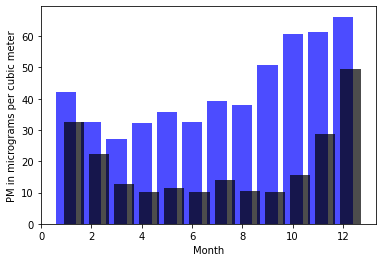

In [38]:
##Monthly mean barplot comparisons##
#I want to plot the months against each other. I will make a graph for each year. 8 total i believe

#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2013_monthlys['month'], pm10_2013_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2013_monthlys['month'] + bar_width, pm25_2013_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2013 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2014_monthlys['month'], pm10_2014_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2014_monthlys['month'] + bar_width, pm25_2014_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2014 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2015_monthlys['month'], pm10_2015_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2015_monthlys['month'] + bar_width, pm25_2015_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2015 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2016_monthlys['month'], pm10_2016_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2016_monthlys['month'] + bar_width, pm25_2016_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 in 2016 Concentrations per Month in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2017_monthlys['month'], pm10_2017_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2017_monthlys['month'] + bar_width, pm25_2017_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 in 2017 Concentrations per Month in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2018_monthlys['month'], pm10_2018_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2018_monthlys['month'] + bar_width, pm25_2018_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2018 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2019_monthlys['month'], pm10_2019_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2019_monthlys['month'] + bar_width, pm25_2019_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2019 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2020_monthlys['month'], pm10_2020_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2020_monthlys['month'] + bar_width, pm25_2020_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2020 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(pm10_2021_monthlys['month'], pm10_2021_monthlys['sample_measurement'], alpha=opacity, color='b', label='PM 10')
plt.bar(pm25_2021_monthlys['month'] + bar_width, pm25_2021_monthlys['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2021 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
#Making data for Coarse_PM using daily values (PM10-PM2.5)
#Using daily_pm10 or df_pm10. For coarse data, can I subtract the means or should I only subtract daily data?

total_data=df_pm10.join(df_pm25['sample_measurement'],rsuffix='_25',how="left")
#total_data.dropna(subset=["0"], inplace=True)
total_data.reset_index(drop=True,inplace=True)

#total_data

TypeError: 'tuple' object is not callable

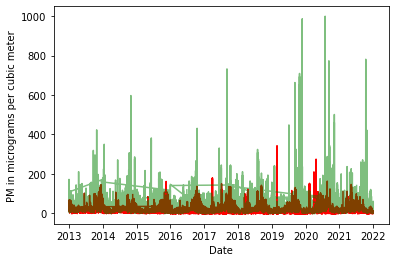

In [40]:
#Plotting all the data for all the dates against each other for PM 10 and PM 2.5 using the new total_data
fg, ax=plt.subplots()
plt.plot(total_data['datetime_local'], total_data['sample_measurement_25'], c='r', label= 'PM 2.5')
plt.plot(total_data['datetime_local'], total_data['sample_measurement'], c='g', label='PM 10', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1200)
plt.title("PM 10 and PM 2.5 Concentrations per Month in 2013-2021 in Fresno, California")
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
#Making daily averages for total_data
total_data=total_data.groupby('date').mean().reset_index()

#Finding the coarse PM data (subtracting PM 10 from PM 2.5) 
total_data['Coarse_PM'] = total_data.sample_measurement - total_data.sample_measurement_25

NameError: name 'total_data' is not defined

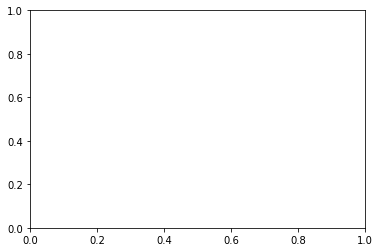

In [10]:
#Plotting the Coarse_PM for all of the years 2013-2021
fg, ax=plt.subplots()
plt.plot(total_data['date'], total_data['Coarse_PM'], c='g', label= 'Coarse_PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(-200,350)
plt.title("Coarse_PM Concentrations per day in 2013-2022 in Fresno, California")
#plt.legend()
plt.tight_layout()
plt.show()

In [11]:
#Adding 25th and 75th percentiles to the graph
total_data_stats=total_data.groupby('Coarse_PM').describe().reset_index()

NameError: name 'total_data' is not defined

In [12]:
#making stats for coarse data
Coarse_data=total_data.filter(items=['date', 'Coarse_PM'])
Coarse_stats=Coarse_data.groupby('date').describe().reset_index()

#Plotting the Coarse_PM for all of the years 2013-2021
fg, ax=plt.subplots()
plt.plot(total_data['date'], total_data['Coarse_PM'], label= 'Coarse_PM', color='blue', alpha=0.1)
plt.fill_between(Coarse_stats['date'], Coarse_stats['Coarse_PM']['25%'],Coarse_stats['Coarse_PM']['75%'],alpha=.5, label='25th percentile and 75th percentile of Coarse_PM',color='pink')

plt.xlabel('Date')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(-200,350)
plt.title("Coarse_PM Concentrations per day in 2013-2022 in Fresno, California")
plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()

NameError: name 'total_data' is not defined

In [13]:
#making a daily ratio PM 10 to 2.5
total_data['PM Ratio 10 to 2.5'] = total_data.sample_measurement / total_data.sample_measurement_25
total_data['PM Ratio 2.5 to 10'] = total_data.sample_measurement_25 / total_data.sample_measurement
annual_pm['Coarse_PM to PM 10'] = total_data.Coarse_PM / total_data.sample_measurement

#Plotting the daily ratio for 2013 to 20121
#Plotting the Coarse_PM for all of the years 2013-2021 for PM 10 to 2.5
fg, ax=plt.subplots()
plt.plot(total_data['date'], total_data['PM Ratio 10 to 2.5'], c='g', label= 'PM Ratio')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,130)
plt.title("Ratio of PM 10 to PM 2.5 per day in 2013-2022 in Fresno, California")
#plt.legend()
plt.tight_layout()
plt.show()

#Plotting the Coarse_PM for all of the years 2013-2021
fg, ax=plt.subplots()
plt.plot(total_data['date'], total_data['PM Ratio 2.5 to 10'], c='g', label= 'PM Ratio')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,15)
plt.title("Ratio of PM 2.5 to PM 10 per day in 2013-2022 in Fresno, California")
#plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'total_data' is not defined

In [14]:
#making annual averages
annual_pm=total_data.groupby('year').mean().reset_index()

#Plotting annual averages 
#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm['year'], annual_pm['sample_measurement'], alpha=1, color='red', label='PM 10')
plt.bar(annual_pm['year'] + bar_width*2, annual_pm['sample_measurement_25'], alpha=1, color='teal', label="PM 2.5")
plt.bar(annual_pm['year'] + bar_width, annual_pm['Coarse_PM'], alpha=1, color='black', label="Coarse_PM")
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,50)
plt.title("Annual Concentrations of PM 10, PM 2.5, and Coarse_PM in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.tight_layout()
plt.show()
#green + black is pm ten. stack green on black to get total mass conc. breaks down what is coarse and whats pm 2.5
#pm 2.5 / pm 10 gets fraction of pm 2.5 normalizes to look at change in fraction 

NameError: name 'total_data' is not defined

In [ ]:
#bar plot renovation 
#making annual averages
annual_pm=total_data.groupby('year').mean().reset_index()

#Plotting annual averages 
#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm['year'], annual_pm['PM Ratio 2.5 to 10'], alpha=1, color='red', label='PM Ratio 2.5 to 10')
plt.bar(annual_pm['year'] + bar_width*2, annual_pm['Coarse_PM to PM 10'], alpha=1, color='teal', label="Coarse PM to PM 10")
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1)
plt.title("Annual Concentrations of PM 10, PM 2.5, and Coarse PM in 2013-2021 in Fresno, California")
plt.legend(bbox_to_anchor=(1.63, 1.0))
plt.tight_layout()
plt.show()

#no call through years . chabge data as csv and file info
#do calcs for high dust season (september october november.When coarse is high.)